In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [7]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

os.listdir(dpath)

['param_sensitivity_pro99_sum.csv.gz',
 'vpro_sum.csv.gz',
 'least_square_LEAK_sum.csv.gz',
 'sensitivity_df.csv.gz',
 'least_square_MIN_sum.csv.gz',
 'baseline_df.csv.gz',
 'param_sensitivity_pro99_mse.csv.gz',
 'baseline_sum.csv.gz',
 'least_square_MIN_df.csv.gz',
 'sensitivity_sum.csv.gz',
 'toremove',
 'vpro_mse.csv.gz',
 'least_square_LEAK_df.csv.gz',
 'sensitivity_mse.csv.gz',
 'least_square_MIN_lsq.csv.gz',
 'param_sensitivity_pro99_df.csv.gz',
 'vpro_df.csv.gz',
 'least_square_LEAK_lsq.csv.gz',
 'baseline_mse.csv.gz']

In [8]:
sum_df = pd.read_csv(os.path.join(dpath,'sensitivity_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'sensitivity_df.csv.gz' ))
mse_df = pd.read_csv(os.path.join(dpath,'sensitivity_mse.csv.gz' ))

In [9]:
basesum_df = pd.read_csv(os.path.join(dpath,'baseline_sum.csv.gz' ))
basedf =  pd.read_csv(os.path.join(dpath,'baseline_df.csv.gz' ))
basemse_df = pd.read_csv(os.path.join(dpath,'baseline_mse.csv.gz' ))

In [10]:
vprosum_df = pd.read_csv(os.path.join(dpath,'vpro_sum.csv.gz' ))
vprodf =  pd.read_csv(os.path.join(dpath,'vpro_df.csv.gz' ))
vpromse_df = pd.read_csv(os.path.join(dpath,'vpro_mse.csv.gz' ))

In [11]:
sum_df = sum_df.loc[~sum_df.run_id.str.contains('pro99')]
df = df.loc[~df.run_id.str.contains('pro99')]
mse_df = mse_df.loc[~mse_df.run_id.str.contains('pro99')]

basesum_df = basesum_df.loc[~basesum_df.run_id.str.contains('pro99')]
basedf = basedf.loc[~basedf.run_id.str.contains('pro99')]
basemse_df = basemse_df.loc[~basemse_df.run_id.str.contains('pro99')]

vprosum_df = vprosum_df.loc[~vprosum_df.run_id.str.contains('pro99')]
vprodf = vprodf.loc[~vprodf.run_id.str.contains('pro99')]
vpromse_df = vpromse_df.loc[~vpromse_df.run_id.str.contains('pro99')]


In [12]:
basemse_df

,Sample,full name,Group,compare_points,MSE,run_id
3,1A0,Axenic,Axenic,74.0,795.229319,baseline_ponly_FULL
4,1B0,Axenic,Axenic,74.0,836.147406,baseline_ponly_FULL
5,1C0,Axenic,Axenic,74.0,877.345874,baseline_ponly_FULL
6,1A0,Axenic,Axenic,74.0,796.898222,baseline_ponly_MIXO
7,1B0,Axenic,Axenic,74.0,836.919813,baseline_ponly_MIXO
8,1C0,Axenic,Axenic,74.0,876.102016,baseline_ponly_MIXO
12,1A0,Axenic,Axenic,74.0,54.677277,baseline_ponly_MIN
13,1B0,Axenic,Axenic,74.0,75.112261,baseline_ponly_MIN
14,1C0,Axenic,Axenic,74.0,82.828692,baseline_ponly_MIN
18,1A0,Axenic,Axenic,74.0,559.526415,baseline_ponly_LEAK


# sensitivity dfs

In [13]:
df.columns

Index(['Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'ABp', 'ABh',
       't', 'day', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id'],
      dtype='object')

In [14]:
df.run_id.unique()

array(['param_sensitivity_ponly_LEAK_Mp_13_h6509066614478615612',
       'param_sensitivity_ponly_MIXO_VmaxOCp_12_h3436064206721348684',
       'param_sensitivity_ponly_MIXO_Mp_5_h-9094396856202172172',
       'param_sensitivity_ponly_FULL_KOCp_11_h7319485082808533554',
       'param_sensitivity_ponly_MIXO_KOCp_17_h-2389873910048829655',
       'param_sensitivity_ponly_MIXO_KONp_0_h638904831957601250',
       'param_sensitivity_ponly_LEAK_Mp_11_h3564779875251448564',
       'param_sensitivity_ponly_FULL_VmaxOCp_10_h-630372776354191222',
       'param_sensitivity_ponly_FULL_VmaxONp_11_h-2346404343347971759',
       'param_sensitivity_ponly_MIN_VmaxINp_10_h-1425866422970010940',
       'param_sensitivity_ponly_FULL_gammaDp_3_h-8613096661107432897',
       'param_sensitivity_ponly_MIXO_KOCp_4_h7456809157374653016',
       'param_sensitivity_ponly_FULL_omegaP_16_h-5688001142757314363',
       'param_sensitivity_ponly_FULL_KONp_2_h8016850584183702388',
       'param_sensitivity_ponly_MIXO_V

In [15]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
sum_df[['sen_param_model', 'idx']] = sum_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [16]:
sum_df[['model', 'sen_param']] = sum_df.sen_param_model.str.split('_', n=1, expand=True)

In [17]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
mse_df[['sen_param_model', 'idx']] = mse_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [18]:
mse_df[['model', 'sen_param']] = mse_df.sen_param_model.str.split('_', n=1, expand=True)

In [19]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
df[['sen_param_model', 'idx']] = df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [20]:
df[['model', 'sen_param']] = df.sen_param_model.str.split('_', n=1, expand=True)

In [21]:
df['model'].unique(),df['sen_param'].unique(),df['idx'].unique()

(array(['LEAK', 'MIXO', 'FULL', 'MIN'], dtype=object),
 array(['Mp', 'VmaxOCp', 'KOCp', 'KONp', 'VmaxONp', 'VmaxINp', 'gammaDp',
        'omegaP', 'VmaxICp', 'KICp', 'EOp', 'E_ROSp', 'KINp', 'decayABp',
        'MABp', 'EABp', 'KABp', 'ROS_decay'], dtype=object),
 array(['13', '12', '5', '11', '17', '0', '10', '3', '4', '16', '2', '8',
        '7', '6', '14', '19', '9', '1', '18', '15'], dtype=object))

In [22]:
sum_df['model'].unique(),sum_df['sen_param'].unique(),sum_df['idx'].unique()

(array(['MIXO', 'FULL', 'LEAK', 'MIN'], dtype=object),
 array(['KINp', 'KONp', 'VmaxINp', 'gammaDp', 'omegaP', 'decayABp', 'KABp',
        'MABp', 'EOp', 'VmaxOCp', 'VmaxONp', 'E_ROSp', 'KOCp', 'KICp',
        'VmaxICp', 'Mp', 'EABp', 'ROS_decay'], dtype=object),
 array(['0', '9', '4', '16', '11', '17', '7', '13', '19', '12', '2', '14',
        '15', '5', '3', '1', '8', '6', '18', '10'], dtype=object))

In [23]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
param_values_df = sum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [24]:
mse_df = pd.merge(mse_df, param_values_df, on=['run_id', 'sen_param'], how='left')

In [25]:
mse_df['model'].unique(),mse_df['sen_param'].unique(),mse_df['idx'].unique()

(array(['MIXO', 'FULL', 'MIN', 'LEAK'], dtype=object),
 array(['KOCp', 'KICp', 'VmaxONp', 'KABp', 'omegaP', 'EABp', 'VmaxINp',
        'gammaDp', 'Mp', 'KINp', 'KONp', 'VmaxICp', 'EOp', 'VmaxOCp',
        'E_ROSp', 'decayABp', 'MABp', 'ROS_decay'], dtype=object),
 array(['1', '14', '6', '7', '2', '17', '5', '18', '12', '15', '19', '8',
        '0', '4', '9', '3', '16', '11', '10', '13'], dtype=object))

# baseline and vpro dfs

In [26]:
basedf.run_id.unique()

array(['baseline_ponly_FULL', 'baseline_ponly_LEAK',
       'baseline_ponly_MIXO', 'baseline_ponly_MIN'], dtype=object)

In [27]:
vprodf[['idx', 'model', 'f_scale']] = vprodf.run_id.str.split('_', expand=True)[[0,4,5]]
vpromse_df[['idx', 'model', 'f_scale']] = vpromse_df.run_id.str.split('_', expand=True)[[0,4,5]]
vprosum_df[['idx', 'model', 'f_scale']] = vprosum_df.run_id.str.split('_', expand=True)[[0,4,5]]


In [28]:
vpromse_df.idx.unique()

array(['vpro'], dtype=object)

In [29]:
basedf[['idx', 'model']] = basedf.run_id.str.split('_', expand=True)[[0,2]]
basemse_df[['idx',  'model']] = basemse_df.run_id.str.split('_', expand=True)[[0,2]]
basesum_df[['idx',  'model']] = basesum_df.run_id.str.split('_', expand=True)[[0,2]]


In [30]:
basemse_df.idx.unique()

array(['baseline'], dtype=object)

In [31]:
basedf = pd.concat([basedf, vprodf], ignore_index=True)
basemse_df = pd.concat([basemse_df, vpromse_df], ignore_index=True)
basesum_df = pd.concat([basesum_df, vprosum_df], ignore_index=True)


In [32]:
basemse_df.idx.unique()

array(['baseline', 'vpro'], dtype=object)

In [33]:
basemse_df.run_id.value_counts()

baseline_ponly_FULL                  3
vpro_ponly_least_square_MIXO_1       3
vpro_ponly_least_square_LEAK_0.1     3
vpro_ponly_least_square_LEAK_0.01    3
vpro_ponly_least_square_MIN_0.01     3
vpro_ponly_least_square_MIXO_0.1     3
vpro_ponly_least_square_MIN_10       3
vpro_ponly_least_square_MIXO_10      3
vpro_ponly_least_square_LEAK_20      3
vpro_ponly_least_square_MIN_20       3
vpro_ponly_least_square_MIXO_20      3
baseline_ponly_MIXO                  3
vpro_ponly_least_square_LEAK_10      3
vpro_ponly_least_square_MIXO_100     3
vpro_ponly_least_square_MIN_1        3
vpro_ponly_least_square_MIN_0.1      3
vpro_ponly_least_square_LEAK_100     3
vpro_ponly_least_square_MIN_100      3
baseline_ponly_LEAK                  3
baseline_ponly_MIN                   3
vpro_ponly_least_square_LEAK_1       3
Name: run_id, dtype: int64

In [34]:
basemse_df.head()

,Sample,full name,Group,compare_points,MSE,run_id,idx,model,f_scale
0,1A0,Axenic,Axenic,74.0,795.229319,baseline_ponly_FULL,baseline,FULL,NaN
1,1B0,Axenic,Axenic,74.0,836.147406,baseline_ponly_FULL,baseline,FULL,NaN
2,1C0,Axenic,Axenic,74.0,877.345874,baseline_ponly_FULL,baseline,FULL,NaN
3,1A0,Axenic,Axenic,74.0,796.898222,baseline_ponly_MIXO,baseline,MIXO,NaN
4,1B0,Axenic,Axenic,74.0,836.919813,baseline_ponly_MIXO,baseline,MIXO,NaN


In [35]:
basesum_df.head()

,Mh,Mp,gammaDp,gammaDh,Rp,Rh,EOp,EIp,EOh,EIh,...,MABp,MABh,r0p,r0h,bp,bh,run_id,idx,model,f_scale
0,0.000001,0.000001,0.600000,0.6,7.0,4.5,0.000000e+00,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_MIN,baseline,MIN,NaN
1,0.000001,0.000001,0.600000,0.6,7.0,4.5,1.157407e-06,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_MIXO,baseline,MIXO,NaN
2,0.000001,0.000001,0.600000,0.6,7.0,4.5,1.157407e-06,0.0,0.000001,0.0,...,1.157407e-07,1.157407e-07,0.000002,0.000002,0.01,0.01,baseline_ponly_FULL,baseline,FULL,NaN
3,0.000001,0.000001,0.600000,0.6,7.0,4.5,1.157407e-06,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_LEAK,baseline,LEAK,NaN
4,0.000001,0.000003,0.198338,0.6,7.0,4.5,4.007643e-07,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,vpro_ponly_least_square_MIXO_0.1,vpro,MIXO,0.1


In [36]:
basedf.head()

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,ABh,t,day,Bp[C],ABp[C],ABh[C],run_id,idx,model,f_scale
0,1.785714,20.000000,0.000000,100.000000,132.500000,0.000000,2241.552301,0.200000,0.000000e+00,0.0,0.0,0.000000,12.500000,0.000000e+00,0.0,baseline_ponly_FULL,baseline,FULL,NaN
1,3.257973,36.610271,0.105979,81.811491,132.548429,0.741854,2231.004986,0.345498,1.476506e-11,0.0,93480.0,1.081944,22.805810,1.033554e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN
2,5.934351,66.827346,0.299304,48.724713,132.647703,2.095129,2212.952593,0.611118,4.154007e-11,0.0,187020.0,2.164583,41.540454,2.907805e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN
3,8.183333,92.203476,0.462430,20.936475,132.742434,3.237008,2198.156240,0.835315,6.407347e-11,0.0,237360.0,2.747222,57.283332,4.485143e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN
4,14.207659,106.671611,0.902467,0.003978,133.047851,6.317266,2159.084417,1.440189,1.247558e-10,0.0,324360.0,3.754167,99.453612,8.732904e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN


In [37]:
mse_df.columns

Index(['Sample', 'full name', 'Group', 'compare_points', 'MSE', 'run_id',
       'sen_param_model', 'idx', 'model', 'sen_param', 'sen_param_value'],
      dtype='object')

In [38]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
baseparam_values_df = basesum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [39]:
basemse_df = pd.merge(basemse_df, baseparam_values_df, on=['run_id'], how='left')

In [40]:
basemse_df.idx.value_counts()

vpro        2397
baseline     564
Name: idx, dtype: int64

In [41]:
basemse_df = basemse_df.loc[
    (basemse_df.model.isin(['MIN']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIN']),'sen_param'])) |
    (basemse_df.model.isin(['LEAK']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['LEAK']),'sen_param'])) |
    (basemse_df.model.isin(['MIXO']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIXO']),'sen_param'])) |
    (basemse_df.model.isin(['FULL']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['FULL']),'sen_param'])) 
]

In [42]:
basemse_df.idx.value_counts()

vpro        399
baseline    126
Name: idx, dtype: int64

In [43]:
mse_df = pd.concat([mse_df, basemse_df],ignore_index=True )

In [44]:
sum_df.model.unique(), sum_df.sen_param.unique(), sum_df.idx.unique(), 

(array(['MIXO', 'FULL', 'LEAK', 'MIN'], dtype=object),
 array(['KINp', 'KONp', 'VmaxINp', 'gammaDp', 'omegaP', 'decayABp', 'KABp',
        'MABp', 'EOp', 'VmaxOCp', 'VmaxONp', 'E_ROSp', 'KOCp', 'KICp',
        'VmaxICp', 'Mp', 'EABp', 'ROS_decay'], dtype=object),
 array(['0', '9', '4', '16', '11', '17', '7', '13', '19', '12', '2', '14',
        '15', '5', '3', '1', '8', '6', '18', '10'], dtype=object))

In [45]:
mse_df.model.unique(), mse_df.sen_param.unique(),mse_df.idx.unique(), 

(array(['MIXO', 'FULL', 'MIN', 'LEAK'], dtype=object),
 array(['KOCp', 'KICp', 'VmaxONp', 'KABp', 'omegaP', 'EABp', 'VmaxINp',
        'gammaDp', 'Mp', 'KINp', 'KONp', 'VmaxICp', 'EOp', 'VmaxOCp',
        'E_ROSp', 'decayABp', 'MABp', 'ROS_decay'], dtype=object),
 array(['1', '14', '6', '7', '2', '17', '5', '18', '12', '15', '19', '8',
        '0', '4', '9', '3', '16', '11', '10', '13', 'baseline', 'vpro'],
       dtype=object))

In [46]:
df.model.unique(), df.sen_param.unique(),df.idx.unique(), 

(array(['LEAK', 'MIXO', 'FULL', 'MIN'], dtype=object),
 array(['Mp', 'VmaxOCp', 'KOCp', 'KONp', 'VmaxONp', 'VmaxINp', 'gammaDp',
        'omegaP', 'VmaxICp', 'KICp', 'EOp', 'E_ROSp', 'KINp', 'decayABp',
        'MABp', 'EABp', 'KABp', 'ROS_decay'], dtype=object),
 array(['13', '12', '5', '11', '17', '0', '10', '3', '4', '16', '2', '8',
        '7', '6', '14', '19', '9', '1', '18', '15'], dtype=object))

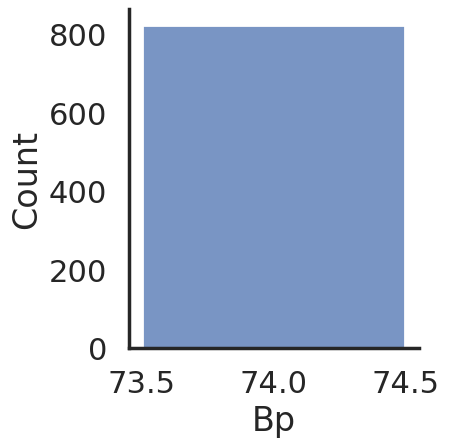

In [47]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [48]:
mse_df.nsmallest(columns='MSE', n=20)

,Sample,full name,Group,compare_points,MSE,run_id,sen_param_model,idx,model,sen_param,sen_param_value,f_scale
933,1A0,Axenic,Axenic,74.0,48.901611,param_sensitivity_ponly_MIN_Mp_10_h-6350224087...,MIN_Mp,10,MIN,Mp,0.000001,NaN
2337,1A0,Axenic,Axenic,74.0,50.373336,param_sensitivity_ponly_MIN_Mp_11_h-4005430513...,MIN_Mp,11,MIN,Mp,0.000001,NaN
141,1A0,Axenic,Axenic,74.0,54.668648,param_sensitivity_ponly_MIN_KICp_0_h-276366306...,MIN_KICp,0,MIN,KICp,0.028550,NaN
1755,1A0,Axenic,Axenic,74.0,54.669046,param_sensitivity_ponly_MIN_KICp_1_h5817399541...,MIN_KICp,1,MIN,KICp,0.033821,NaN
261,1A0,Axenic,Axenic,74.0,54.669517,param_sensitivity_ponly_MIN_KICp_2_h-587032821...,MIN_KICp,2,MIN,KICp,0.040065,NaN
1359,1A0,Axenic,Axenic,74.0,54.670076,param_sensitivity_ponly_MIN_KICp_3_h-642780311...,MIN_KICp,3,MIN,KICp,0.047461,NaN
1599,1A0,Axenic,Axenic,74.0,54.670738,param_sensitivity_ponly_MIN_KICp_4_h4268934620...,MIN_KICp,4,MIN,KICp,0.056223,NaN
612,1A0,Axenic,Axenic,74.0,54.671522,param_sensitivity_ponly_MIN_KICp_5_h2091062636...,MIN_KICp,5,MIN,KICp,0.066602,NaN
2169,1A0,Axenic,Axenic,74.0,54.672070,param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...,MIN_VmaxINp,0,MIN,VmaxINp,0.000016,NaN
1632,1A0,Axenic,Axenic,74.0,54.672451,param_sensitivity_ponly_MIN_KICp_6_h-181862465...,MIN_KICp,6,MIN,KICp,0.078898,NaN


In [49]:
mse_df['mode'] = 'sensitivity'
mse_df.loc[mse_df.idx.isin(['baseline']), 'mode'] = 'baseline'
mse_df.loc[mse_df.idx.isin(['vpro']), 'mode'] = 'vpro'


In [50]:
basedf['mode'] = 'sensitivity'
basedf.loc[basedf.idx.isin(['baseline']), 'mode'] = 'baseline'
basedf.loc[basedf.idx.isin(['vpro']), 'mode'] = 'vpro'


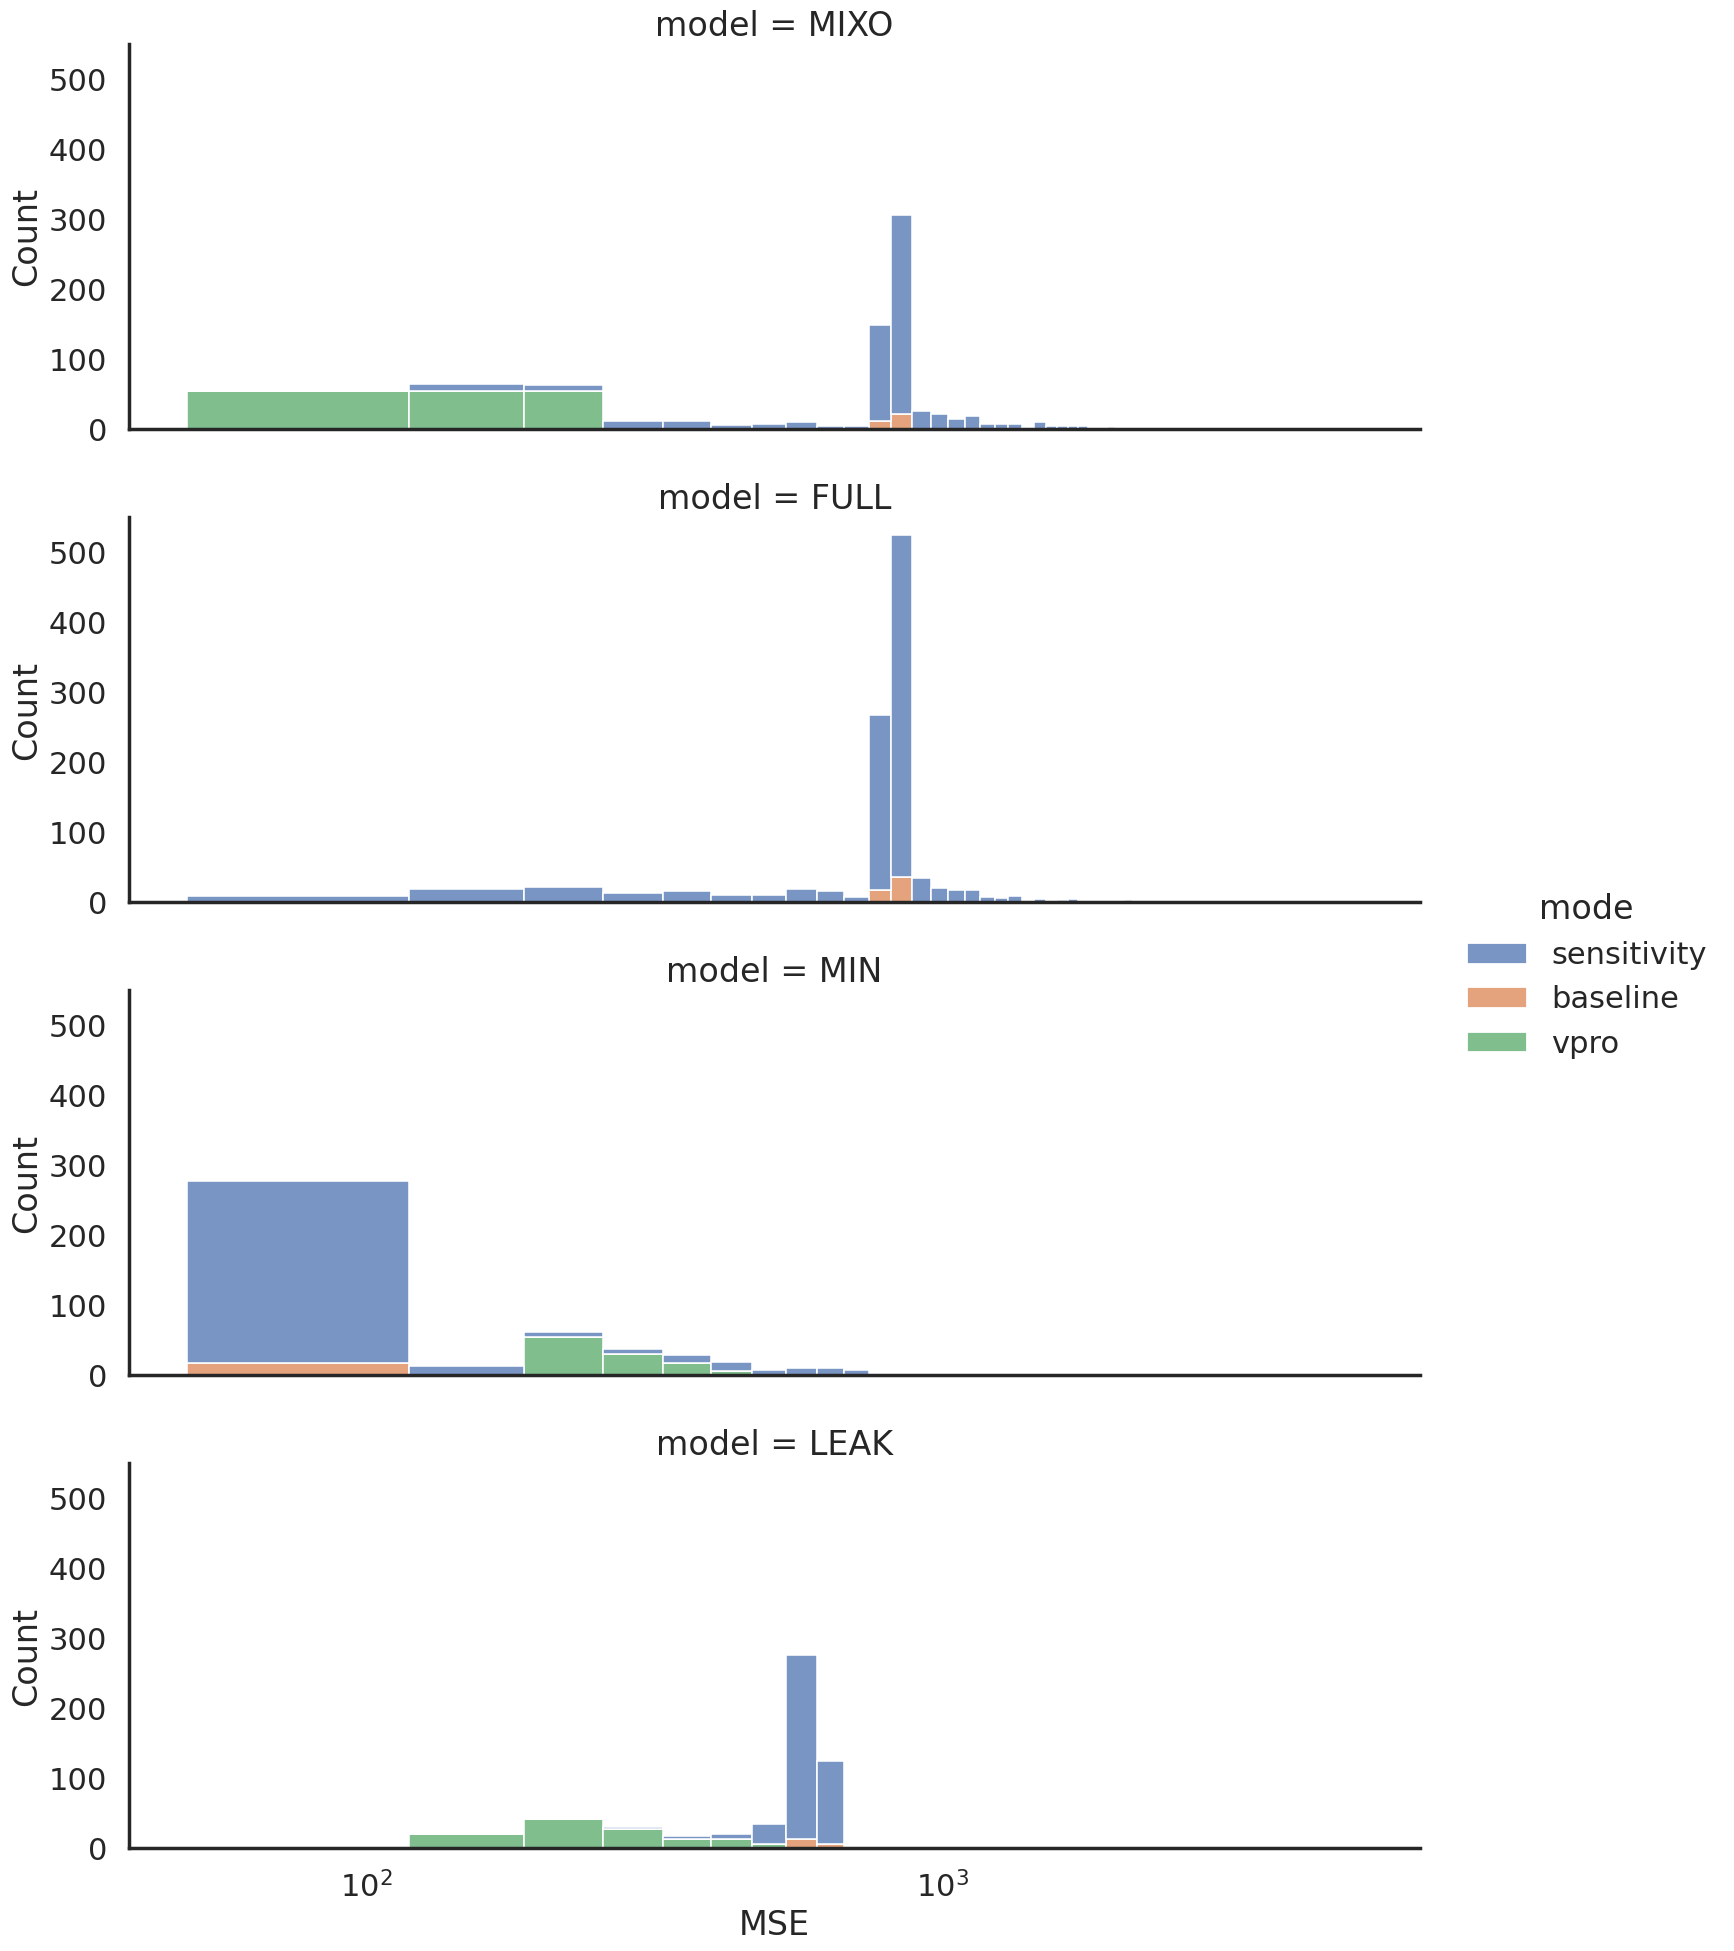

In [51]:
sns.displot(mse_df, x='MSE',aspect=3, row='model', hue='mode',multiple='stack' )
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [52]:
df.min()

Bp                                                               0.0
DON                                                         0.003298
RDON                                                             0.0
DIN                                                         0.000736
DOC                                                         0.036257
RDOC                                                             0.0
DIC                                                         0.019431
ROS                                                         0.055182
ABp                                                              0.0
ABh                                                              0.0
t                                                                0.0
day                                                              0.0
Bp[C]                                                            0.0
ABp[C]                                                           0.0
ABh[C]                            

In [53]:
basedf.min()

/tmp/ipykernel_867811/2505142616.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  basedf.min()


Bp                        0.0
DON                  0.002532
RDON                      0.0
DIN                  0.000148
DOC                     132.5
RDOC                      0.0
DIC                  0.101415
ROS                  0.055182
ABp                       0.0
ABh                       0.0
t                         0.0
day                       0.0
Bp[C]                     0.0
ABp[C]                    0.0
ABh[C]                    0.0
run_id    baseline_ponly_FULL
idx                  baseline
model                    FULL
mode                 baseline
dtype: object

In [54]:
mse_df.idx.value_counts()

vpro        399
baseline    126
19          126
0           123
13          123
10          123
11          123
16          123
3           123
9           123
4           123
1           123
14          123
15          123
12          123
18          123
5           123
17          123
2           123
7           123
6           123
8           123
Name: idx, dtype: int64

In [55]:
sns.color_palette('Dark2')

In [56]:
model_name = 'MIN'
mpalette = sns.color_palette('Dark2', n_colors=3)
morder = ['sensitivity', 'baseline', 'vpro']
sensitivity_color= mpalette[0]
baseline_color= mpalette[1]
vpro_color= mpalette[2]

#all_df = pd.concat([df, basedf, vprodf], ignore_index=True)
min_porder = ['VmaxINp', 'KINp', 'VmaxICp', 'KICp', 'Mp', 'gammaDp']

In [57]:
mse_df.loc[mse_df.model.isin([model_name])].sen_param.unique()


array(['VmaxINp', 'gammaDp', 'Mp', 'KINp', 'VmaxICp', 'KICp'],
      dtype=object)

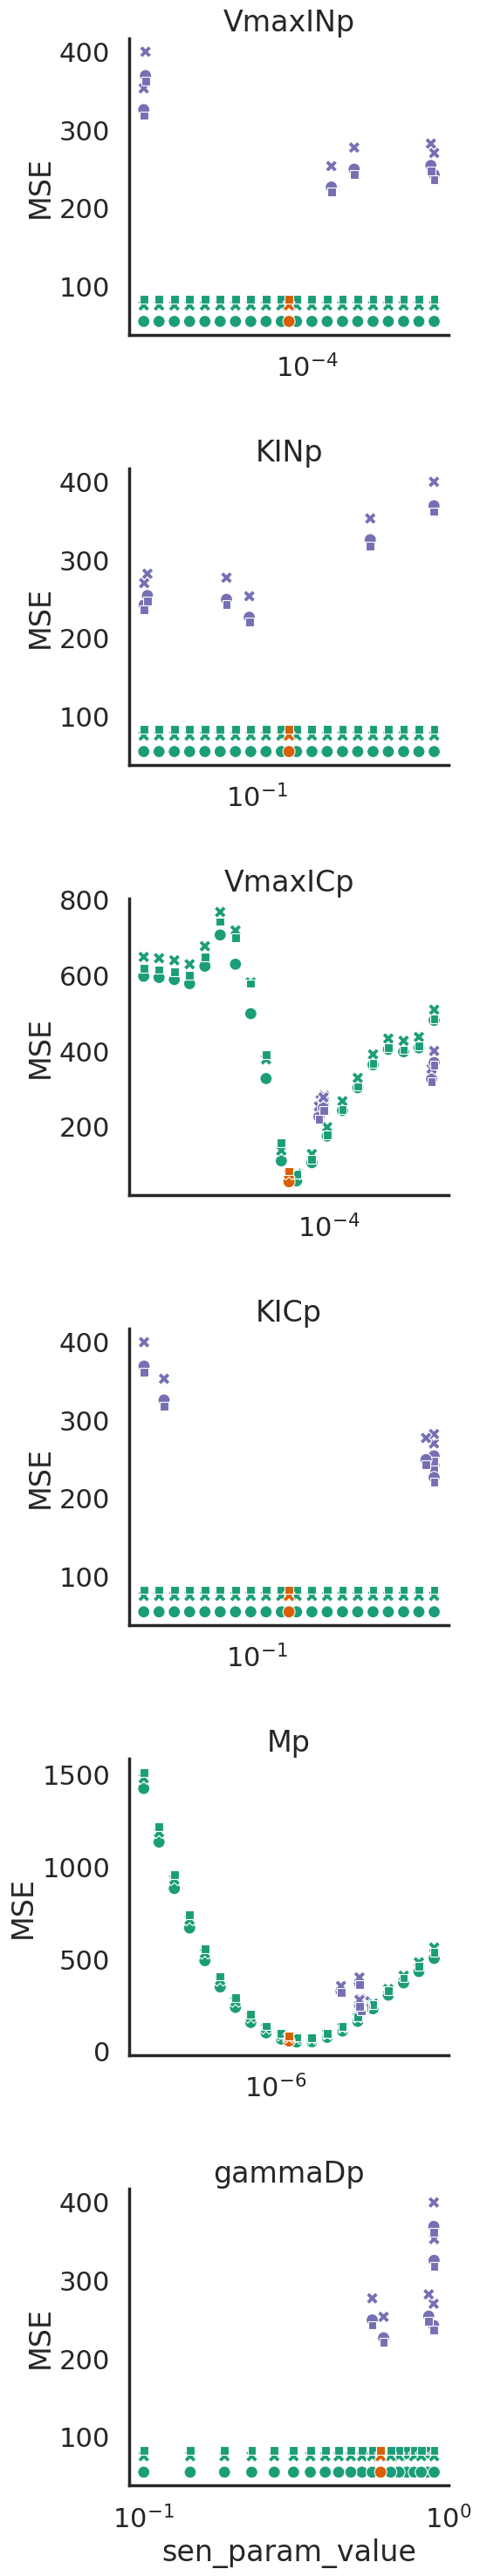

In [58]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin([model_name])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    row_order = min_porder,
    style='Sample', 
    hue ='mode', legend=False,
    palette=mpalette, hue_order=morder,
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

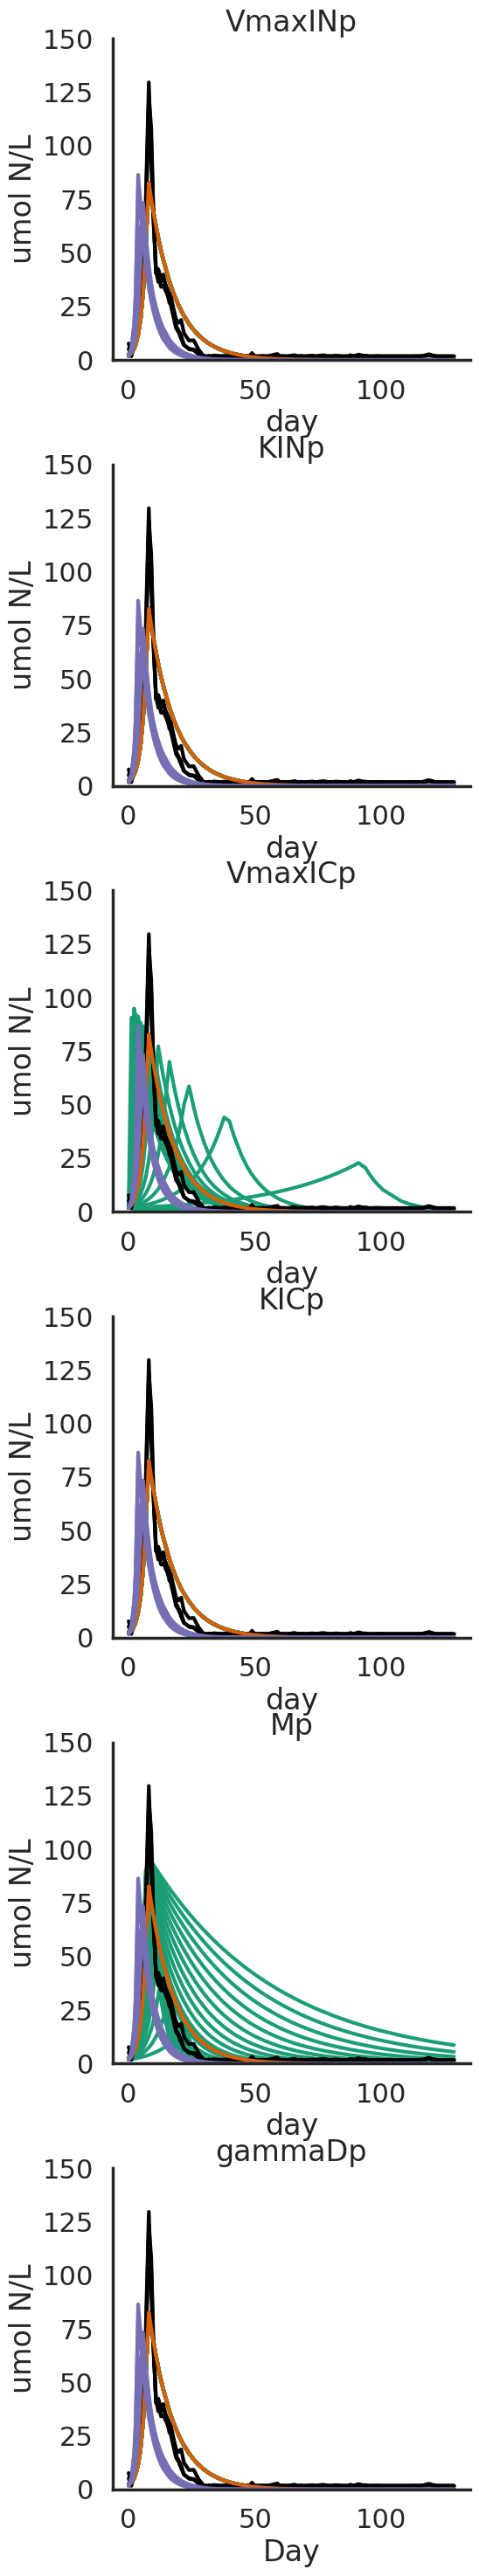

In [59]:
for m in ['MIN']:
    mdf2 = df.loc[df.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[sensitivity_color], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_order = min_porder,
        col_wrap=1,
        kind='line', #lw=1,
        aspect=1.2, legend=False,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
        
    ).set(ylim=(0,150))

    for ax in g.axes:
        sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )
        sns.lineplot(
            data=basedf.loc[basedf.model.isin([m])],
            x='day', y='Bp',
            estimator=None, units='run_id',
            hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
            ax=ax,
        )
        

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    #plt.suptitle(m, y=1)
    plt.show()

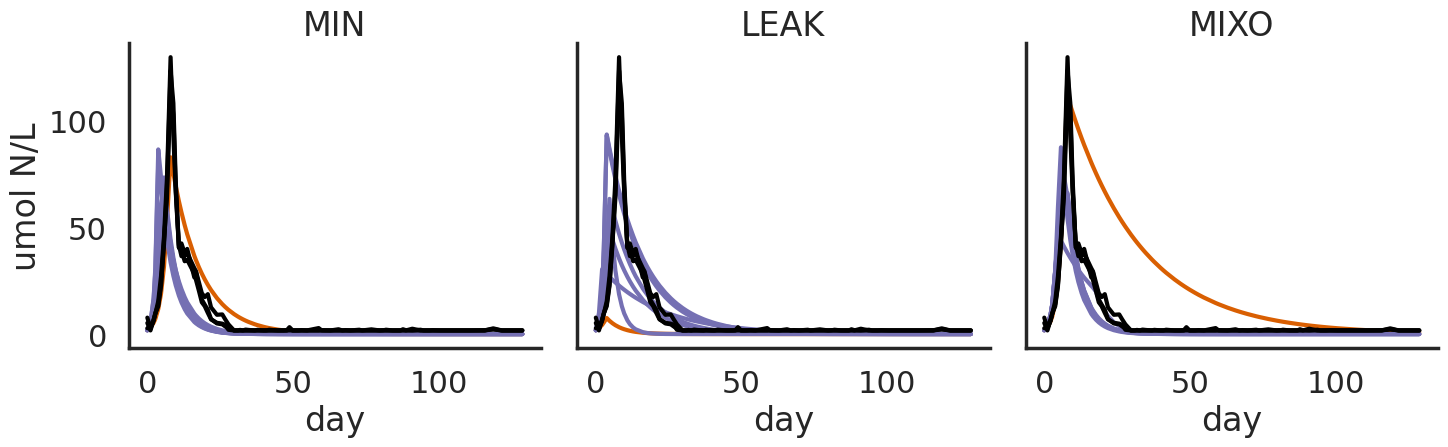

In [60]:
#base_df['model_'] = base_df['model_']

g = sns.relplot(
    data=basedf,# .loc[basedf.model.isin([m])],
    x='day', y='Bp', col='model', col_order=['MIN', 'LEAK', 'MIXO'],
    estimator=None, units='run_id', kind='line',
    hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
)
for ax in g.axes_dict.values():
    sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', ax=ax
    )
g.set_titles(col_template='{col_name}',)
g.set(ylabel='umol N/L')


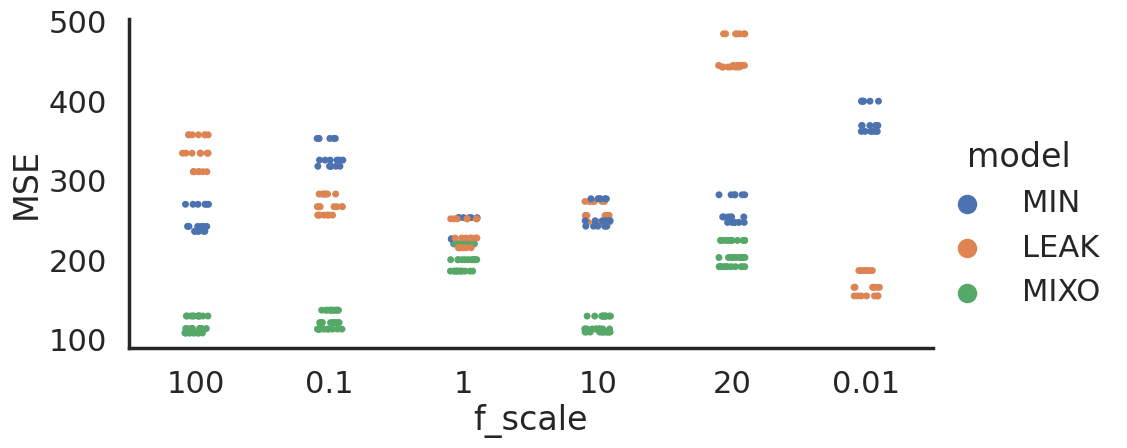

In [61]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='f_scale', y='MSE', aspect=2, hue='model',
)

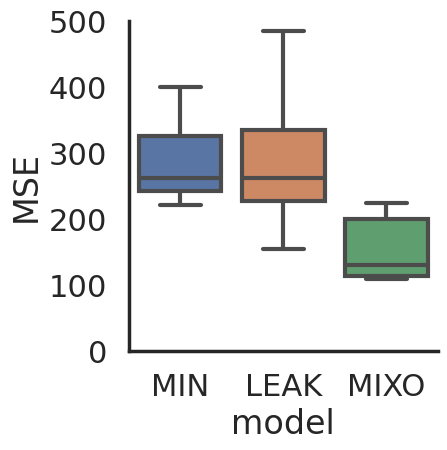

In [74]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='model', y='MSE', aspect=1, hue='model',kind='box', dodge=False,
).set(ylim=(0,500))

In [62]:
refdf.dtypes

day             float64
Sample           object
id                int64
replicate        object
transfer          int64
transfer day      int64
heterotroph      object
full name        object
FL              float64
Group            object
predicted       float64
ref_Bp          float64
LOD                bool
t               float64
dtype: object

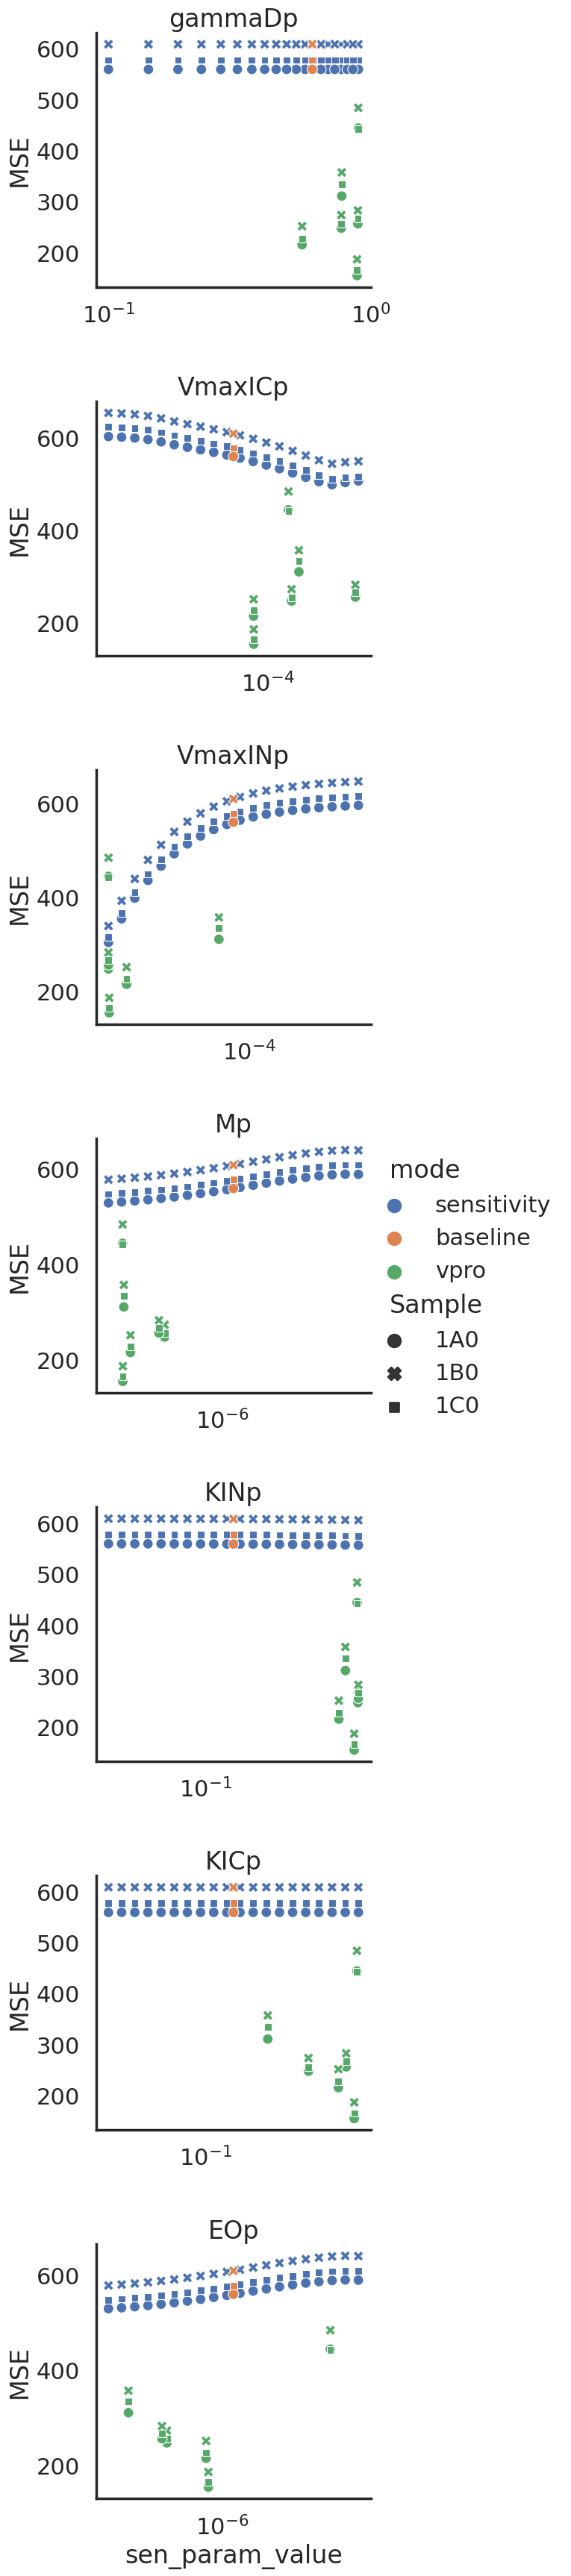

In [63]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

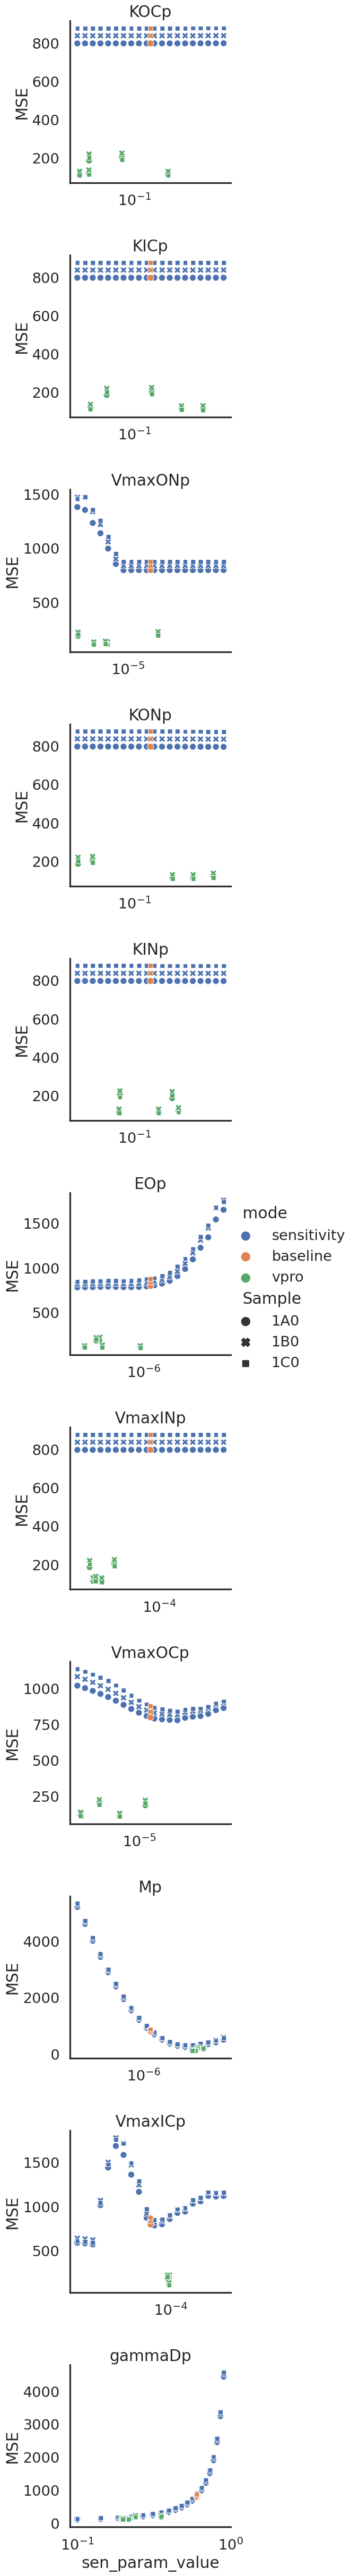

In [64]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [65]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      27
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [66]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

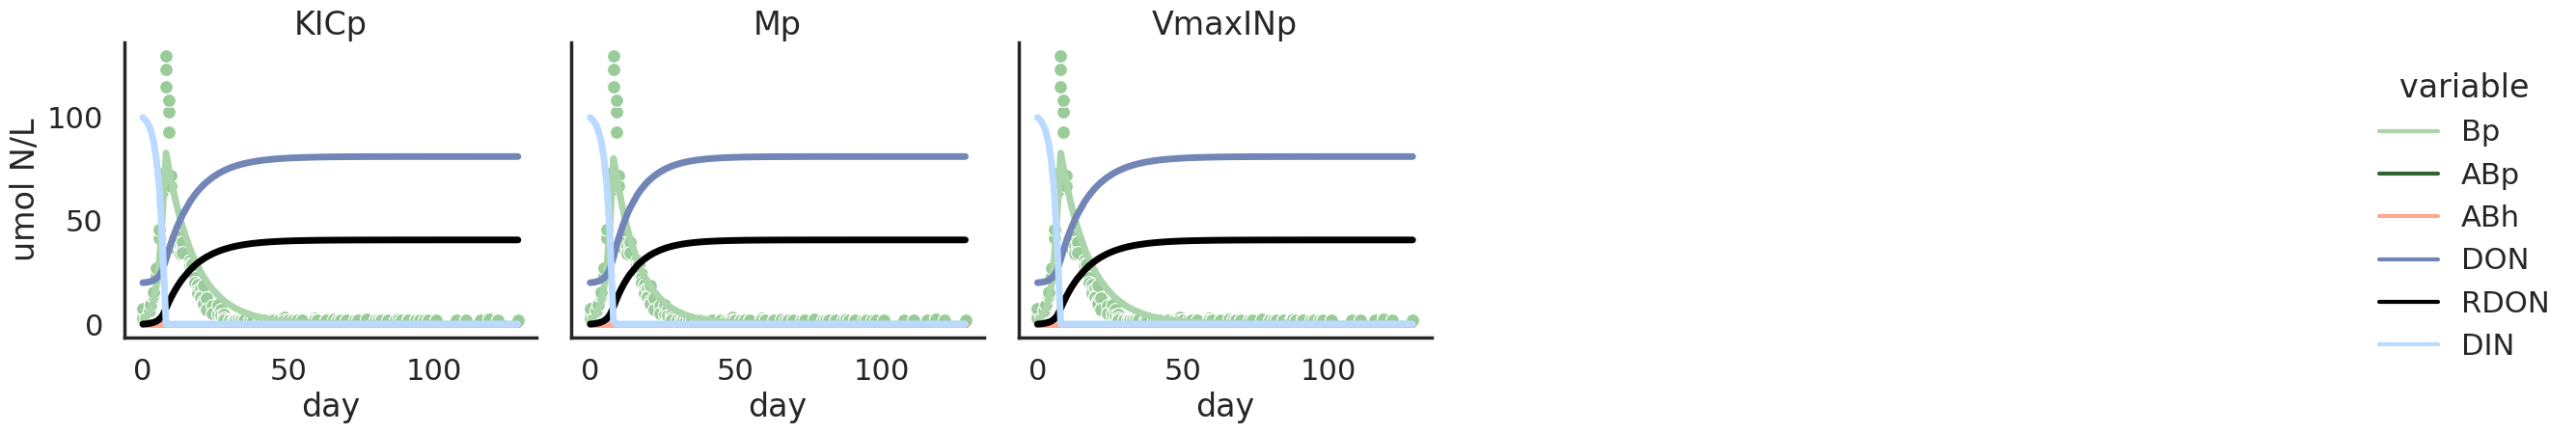

In [67]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [68]:
plt.show()

In [69]:
lowest_ids

933     param_sensitivity_ponly_MIN_Mp_10_h-6350224087...
2337    param_sensitivity_ponly_MIN_Mp_11_h-4005430513...
141     param_sensitivity_ponly_MIN_KICp_0_h-276366306...
1755    param_sensitivity_ponly_MIN_KICp_1_h5817399541...
261     param_sensitivity_ponly_MIN_KICp_2_h-587032821...
1359    param_sensitivity_ponly_MIN_KICp_3_h-642780311...
1599    param_sensitivity_ponly_MIN_KICp_4_h4268934620...
612     param_sensitivity_ponly_MIN_KICp_5_h2091062636...
2169    param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...
1632    param_sensitivity_ponly_MIN_KICp_6_h-181862465...
Name: run_id, dtype: object